# Dependencias

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Dataset

In [2]:
# Carregar o conjunto de dados MNIST como exemplo
(X_train, _), (X_test, _) = mnist.load_data()

# Pré-processamento dos dados (apenas para exemplo, adapte conforme necessário)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


# Modelo

In [3]:
# Definir a arquitetura do autoencoder
input_dim = 784  # Número de features na entrada (28x28 para MNIST)
encoding_dim = 32  # Número de neurons na camada de encoding

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Criar o modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Visualizar a arquitetura do autoencoder
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


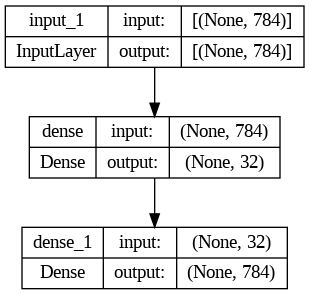

In [4]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

# Treinamento

In [5]:
# Treinar o modelo
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Avaliar o modelo nos dados de teste
score = autoencoder.evaluate(X_test, X_test)
print("Loss nos dados de teste:", score)

Epoch 1/50
235/235 [==============================] - 7s 23ms/step - loss: 0.2760 - val_loss: 0.1882
Epoch 2/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1703 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1440 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1285 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1184 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1114 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1062 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0996 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0976 - val_lo

# Teste

1/1 [==============================] - 0s 89ms/step


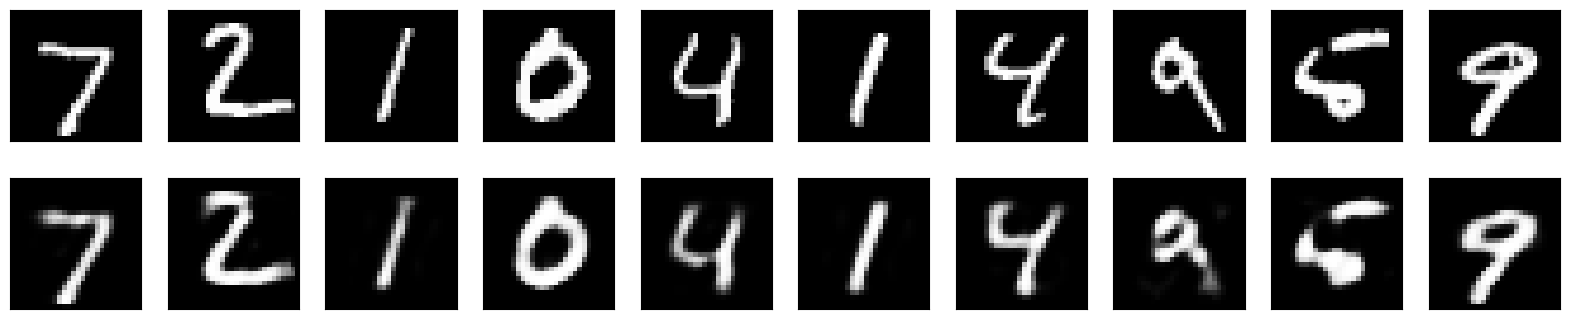

In [6]:
# Reconstruir alguns exemplos de dados de teste e comparar com os originais
num_examples = 10
decoded_imgs = autoencoder.predict(X_test[:num_examples])

# Plotar alguns exemplos
plt.figure(figsize=(20, 4))
for i in range(num_examples):
    # Imagem original
    ax = plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída pelo autoencoder
    ax = plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()